In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("base.tsv", sep='\t', header=0)

In [ ]:
#df.dropna(subset=['score'], inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138763 entries, 0 to 138762
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          138763 non-null  object 
 1   titleType       138763 non-null  object 
 2   primaryTitle    138763 non-null  object 
 3   startYear       138763 non-null  int64  
 4   runtimeMinutes  138763 non-null  int64  
 5   averageRating   138763 non-null  float64
 6   numVotes        138763 non-null  int64  
 7   Action          138763 non-null  int64  
 8   Adult           138763 non-null  int64  
 9   Adventure       138763 non-null  int64  
 10  Animation       138763 non-null  int64  
 11  Biography       138763 non-null  int64  
 12  Comedy          138763 non-null  int64  
 13  Crime           138763 non-null  int64  
 14  Documentary     138763 non-null  int64  
 15  Drama           138763 non-null  int64  
 16  Family          138763 non-null  int64  
 17  Fantasy   

In [3]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'startYear', 'runtimeMinutes',
       'averageRating', 'numVotes', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western\r',
       'overview', 'tmdbVoteAvg', 'poster'],
      dtype='object')

TitleTypes

In [4]:
print(df['titleType'].unique())

['movie' 'tvSeries' 'tvMovie' 'tvMiniSeries' 'tvShort']


Number of tv series:  18040
Number of movies:  109561


<Axes: xlabel='titleType', ylabel='count'>

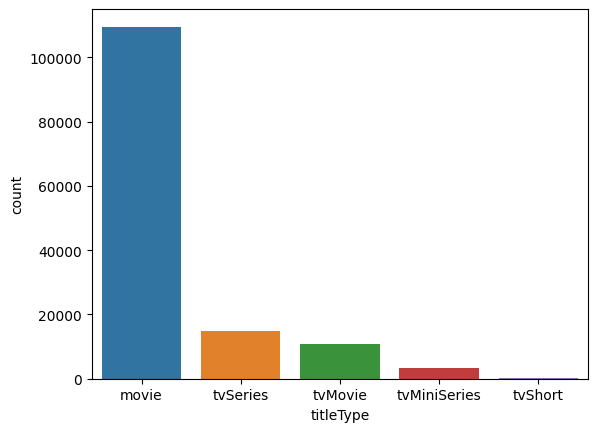

In [5]:
number_of_shows=df.titleType.str.contains('tvSeries').value_counts()[True]+df.titleType.str.contains('tvMiniSeries').value_counts()[True]
number_of_movies=df.titleType.str.contains('movie').value_counts()[True]
print("Number of tv series: ", number_of_shows)
print("Number of movies: ", number_of_movies)
sns.countplot(x ='titleType', data = df) 

startYear

Min:  1894
Mean:  1998.2371309354799
Max:  2023
Std:  23.376507220265005


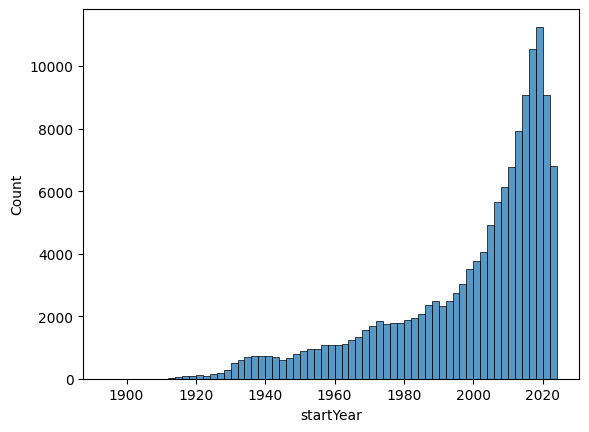

In [6]:
print("Min: ", np.min(df.startYear))
print("Mean: ",np.mean(df.startYear))
print("Max: ", np.max(df.startYear))
print("Std: ", np.std(df.startYear))
sns.histplot(data=df, x="startYear", binwidth=2);

runtimeMinutes  

Mean:  94.40099306010968
Min:  1
Max:  5220
Std:  47.54169839890522


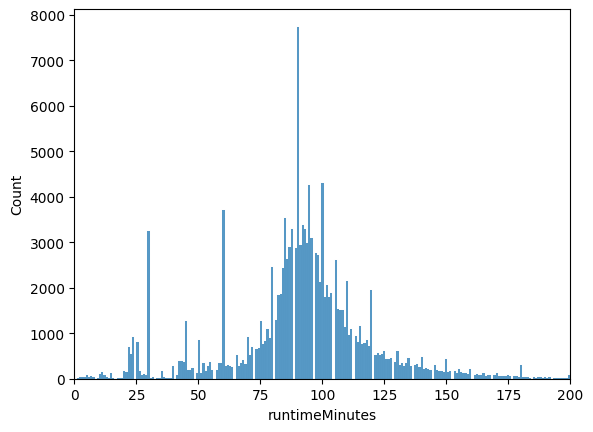

: 

In [7]:
print("Mean: ",np.mean(df.runtimeMinutes))
print("Min: ", np.min(df.runtimeMinutes))
print("Max: ", np.max(df.runtimeMinutes))
print("Std: ", np.std(df.runtimeMinutes))
g=sns.histplot(df, x="runtimeMinutes");
g.set_xlim(0, 200);

Genres

In [7]:
print("Number of genres: 28")
print(df[['Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']].sum())

Number of genres: 28
Action         18987
Adult            476
Adventure      12804
Animation       6717
Biography       5457
Comedy         42585
Crime          18097
Documentary    12156
Drama          70489
Family          7558
Fantasy         6294
Film-Noir        800
Game-Show        399
History         4904
Horror         13067
Music           3651
Musical         2431
Mystery         9115
News             280
Reality-TV      1080
Romance        20052
Sci-Fi          5372
Short            210
Sport           2207
Talk-Show        281
Thriller       16495
War             3105
Western         2494
dtype: int64


averageRating

Mean:  6.08726029272933
Min:  1.0
Max:  9.8
Std:  1.2651580697345308


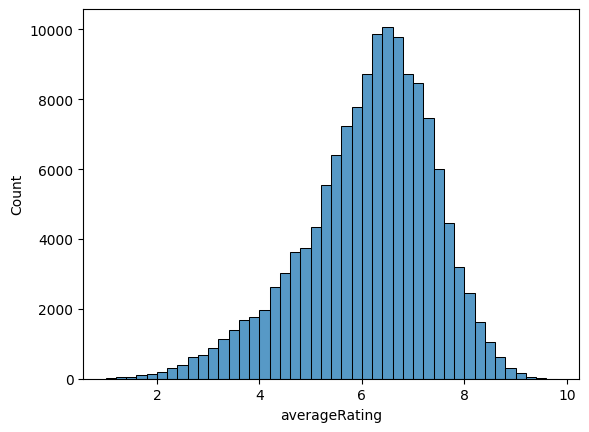

In [14]:
print("Mean: ",np.mean(df.averageRating))
print("Min: ", np.min(df.averageRating))
print("Max: ", np.max(df.averageRating))
print("Std: ", np.std(df.averageRating))
sns.histplot(data=df, x="averageRating", binwidth=0.2);

numVotes

Mean:  8806.687820240266
Min:  100
Max:  2804390
Std:  54184.33743624426


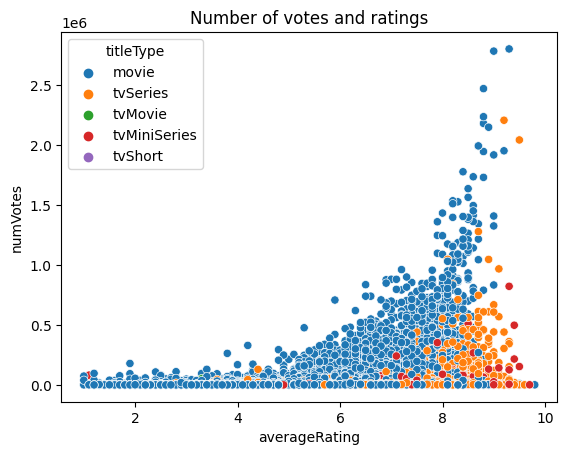

In [15]:
print("Mean: ",np.mean(df.numVotes))
print("Min: ", np.min(df.numVotes))
print("Max: ", np.max(df.numVotes))
print("Std: ", np.std(df.numVotes))
#sns.displot(df.numVotes);
sns.scatterplot(data=df, y="numVotes", x="averageRating", hue="titleType");

plt.title("Number of votes and ratings");

In [ ]:
df.sort_values(by='averageRating', ascending=False).head(20)

In [16]:
(df.averageRating>9).sum()

136

In [21]:
df.groupby('titleType')['numVotes'].mean()

titleType
movie           9741.041913
tvMiniSeries    5288.003962
tvMovie          986.297828
tvSeries        8564.836439
tvShort         1164.504854
Name: numVotes, dtype: float64

In [22]:
df.groupby('titleType')['averageRating'].mean()

titleType
movie           5.931755
tvMiniSeries    7.207193
tvMovie         6.050666
tvSeries        7.007440
tvShort         6.974757
Name: averageRating, dtype: float64

tmdbVoteAvg

In [23]:
df.groupby('titleType')['tmdbVoteAvg'].mean()

titleType
movie           5.859199
tvMiniSeries    6.983441
tvMovie         6.004952
tvSeries        6.967694
tvShort         6.664689
Name: tmdbVoteAvg, dtype: float64

Mean:  6.016385679179608
Min:  0.5
Max:  10.0
Std:  1.381931946018639


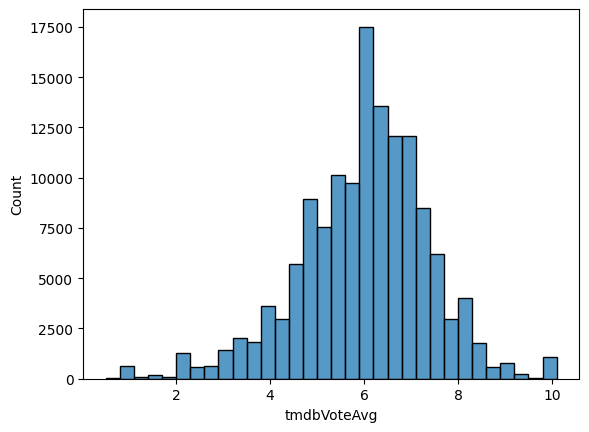

In [24]:
print("Mean: ",np.mean(df.tmdbVoteAvg))
print("Min: ", np.min(df.tmdbVoteAvg))
print("Max: ", np.max(df.tmdbVoteAvg))
print("Std: ", np.std(df.tmdbVoteAvg))
sns.histplot(data=df, x="tmdbVoteAvg", binwidth=0.3);

poster

In [25]:
print("Number of posters missing: ",len(df[df['poster'].str.contains('None')]))

Number of posters missing:  1


Scores

In [ ]:
number_of_likes=(df.score>0).sum()
number_of_dislikes=(df.score==0).sum()
print("Liked: ", number_of_likes)
print("Disliked: ", number_of_dislikes)

In [126]:
df.to_csv('Lili.tsv', sep="\t", index=False)